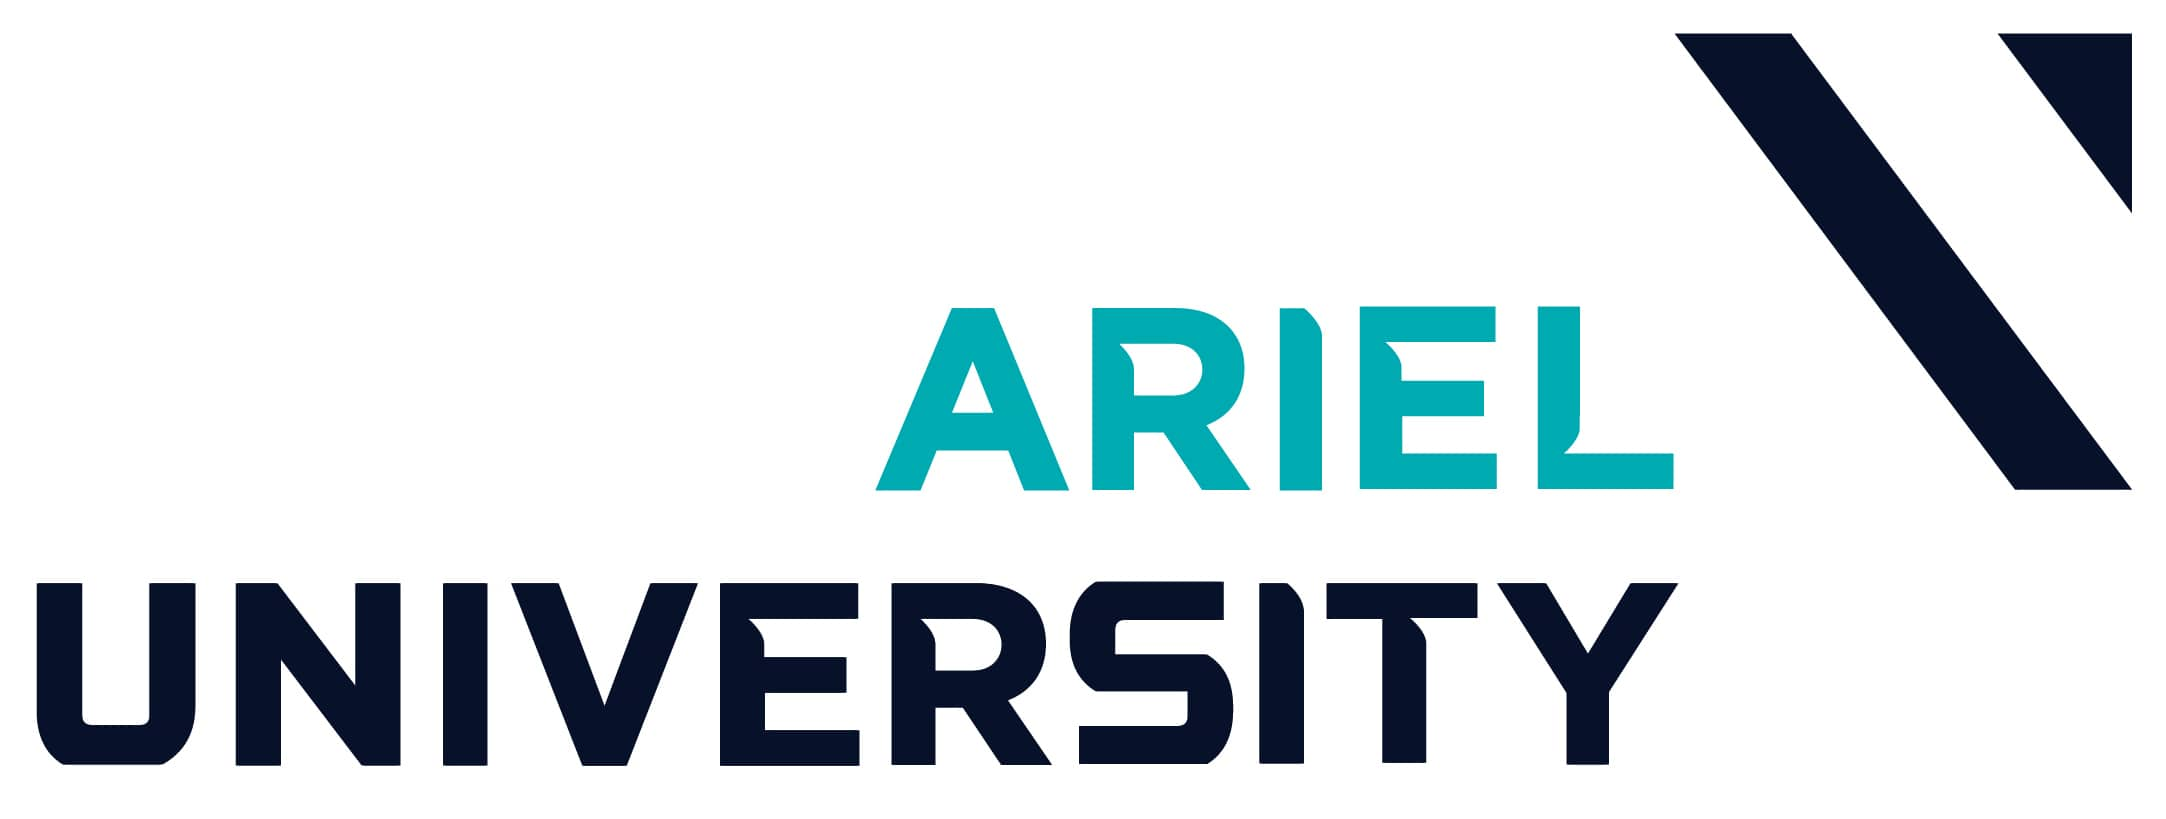

In [6]:
from IPython import display
display.Image("https://www.ariel.ac.il/sites/Navon-Venezia/img/Ariel_U_logo2.jpg")

#### Presented by:


* Leor Neuman
* 
* 

# Source: 
kaggle:"https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset"

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [83]:
df=pd.read_csv('https://raw.githubusercontent.com/hhneuman/Data-Analisys/main/Sleep_health_and_lifestyle_dataset.csv')
sleep_df=df.copy()

In [84]:
sleep_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [126]:
sleep_df['Sleep Disorder'].head(20)

0            None
1            None
2            None
3     Sleep Apnea
4     Sleep Apnea
5        Insomnia
6        Insomnia
7            None
8            None
9            None
10           None
11           None
12           None
13           None
14           None
15           None
16    Sleep Apnea
17    Sleep Apnea
18       Insomnia
19           None
Name: Sleep Disorder, dtype: object

In [85]:
sleep_df['BMI Category']=sleep_df['BMI Category'].replace('Normal Weight','Normal')
sleep_df[['BMI Category']].max

<bound method NDFrame._add_numeric_operations.<locals>.max of     BMI Category
0     Overweight
1         Normal
2         Normal
3          Obese
4          Obese
..           ...
369   Overweight
370   Overweight
371   Overweight
372   Overweight
373   Overweight

[374 rows x 1 columns]>

In [86]:
sleep_df['BMI Category']=sleep_df['BMI Category'].replace(['Normal','Overweight','Obese'],[1,2,3])
sleep_df[['BMI Category']]

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
369,Female
370,Female
371,Female
372,Female


In [125]:
#zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe']
male_sleep_df = sleep_df.iloc[sleep_df.gender == 'Male']

AttributeError: 'DataFrame' object has no attribute 'gender'

In [170]:
grouped_df1 = sleep_df.groupby(['Occupation','Gender','Sleep Disorder'])[['Quality of Sleep','Stress Level','Age','Blood Pressure','Physical Activity Level','Sleep Duration','Heart Rate','Daily Steps','BMI Category']].max()
grouped_df1

Quality of Sleep  Stress Level  \
Occupation           Gender Sleep Disorder                                   
Accountant           Female Insomnia                       8             7   
                            None                           9             6   
                     Male   None                           8             6   
Doctor               Female None                           9             3   
                     Male   Insomnia                       7             8   
                            None                           7             8   
                            Sleep Apnea                    9             8   
Engineer             Female Insomnia                       9             3   
                            None                           9             3   
                     Male   Insomnia                       8             7   
                            None                           8             7   
                            Sleep Apnea                    8             5   
Lawyer               Female None                           7             6   
                            Sleep Apnea                    7             5   
                     Male   Insomnia                       8             5   
                            None                           8             6   
                            Sleep Apnea                    8             5   
Manager              Female None                           7             5   
Nurse                Female Insomnia                       6             8   
                            None                           9             8   
                            Sleep Apnea                    9             8   
Sales Representative Male   Sleep Apnea                    4             8   
Salesperson          Male   Insomnia                       6             7   
                            None                           6             7   
                            Sleep Apnea                    6             7   
Scientist            Female None                           6             6   
                            Sleep Apnea                    4             8   
Software Engineer    Male   Insomnia                       4             8   
                            None                           8             6   
Teacher              Female Insomnia                       7             6   
                            None                           8             4   
                            Sleep Apnea                    8             7   
                     Male   Insomnia                       6             7   
                            None                           7             5   
                            Sleep Apnea                    5             7   

                                            Age Blood Pressure  \
Occupation           Gender Sleep Disorder                       
Accountant           Female Insomnia         52         130/85   
                            None             40         119/77   
                     Male   None             32         118/76   
Doctor               Female None             56         118/75   
                     Male   Insomnia         48         142/92   
                            None             33         125/80   
                            Sleep Apnea      49         139/91   
Engineer             Female Insomnia         53         125/80   
                            None             54         125/80   
                     Male   Insomnia         44         132/87   
                            None             43         130/85   
                            Sleep Apnea      43         130/85   
Lawyer               Female None             39         128/85   
                            Sleep Apnea      38         135/88   
                     Male   Insomnia         41         130/85   
                            None   

<AxesSubplot:>

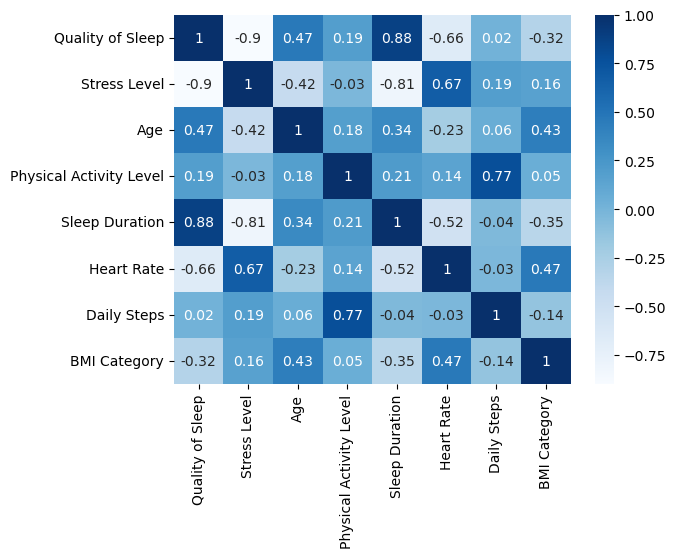

In [141]:
features=['Quality of Sleep','Stress Level','Age','Blood Pressure','Physical Activity Level','Sleep Duration','Heart Rate','Daily Steps','BMI Category']
correlation_matrix = sleep_df[features].corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True)

In [169]:
grouped_df2 = sleep_df.groupby('Sleep Disorder')[['Quality of Sleep','Stress Level','Age','Blood Pressure','Physical Activity Level','Sleep Duration','Heart Rate','Daily Steps','BMI Category']]


<AxesSubplot:ylabel='Sleep Disorder-None'>

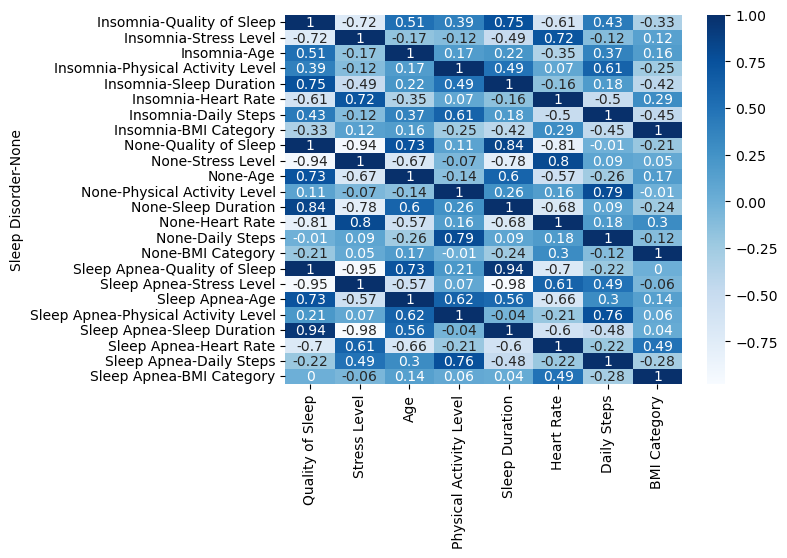

In [166]:
correlation_matrix2 = grouped_df2.corr().round(2)
sns.heatmap(data=correlation_matrix2,cmap='Blues', annot=True)

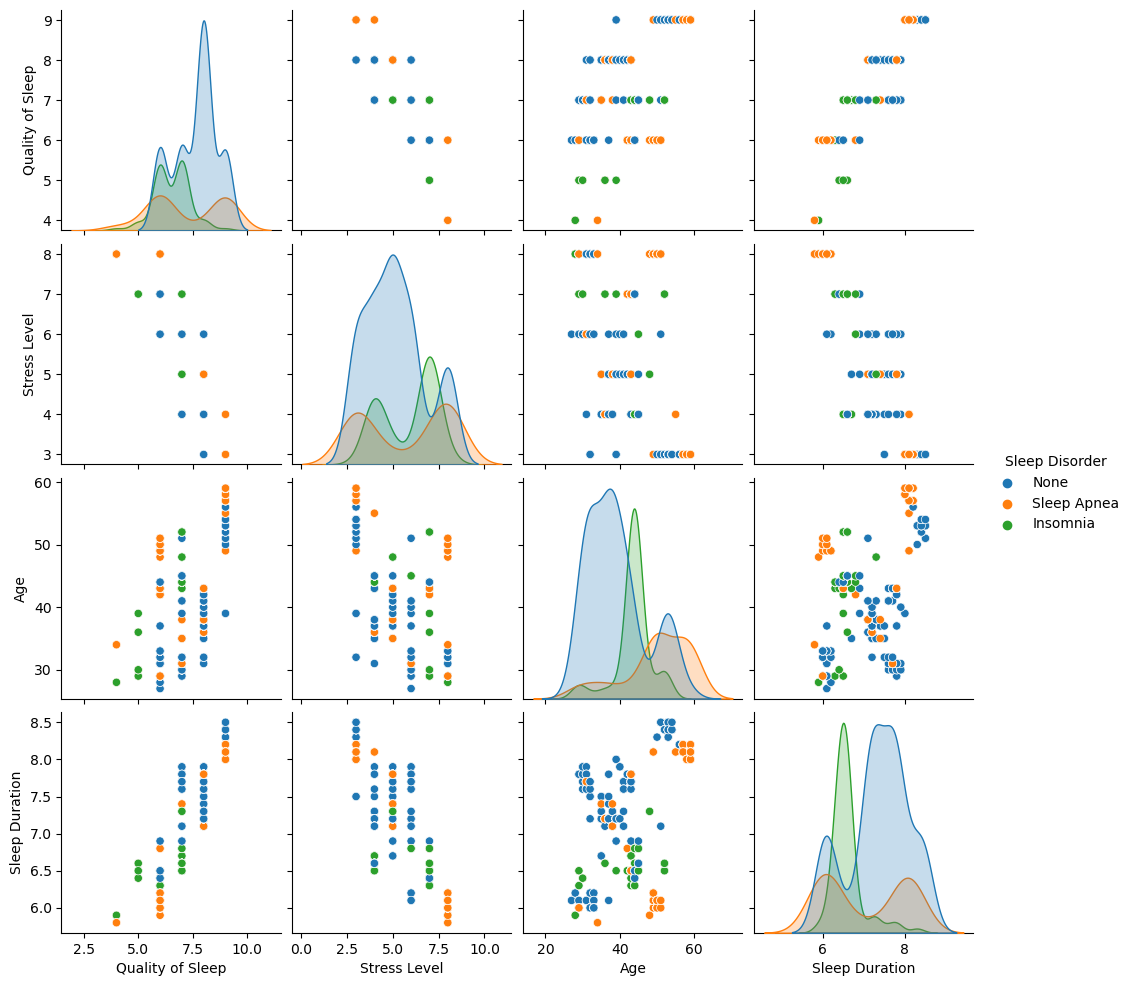

In [163]:
features2=['Sleep Disorder','Quality of Sleep','Stress Level','Age','Sleep Duration']
sns.pairplot(sleep_df[features2], hue='Sleep Disorder')
plt.show()

Ideas:
1.Stress-Sleep Quality
2.Sleep-BMI
3.Occ-Sleep Dur/Qua*
4.Occ+Stress-Sleep Dur/Qua
5.Disorder(Insomnia)+Stress-Sleep Qua
6.Age+Stress-Sleep Dur/Qua
7.Sleep Dur Compared to Physical Activiry and Sleep Quality*
8.Gender+Occ-Sleep Qua*
9.Occ+Sleep Dur-Sleep Qua
10.

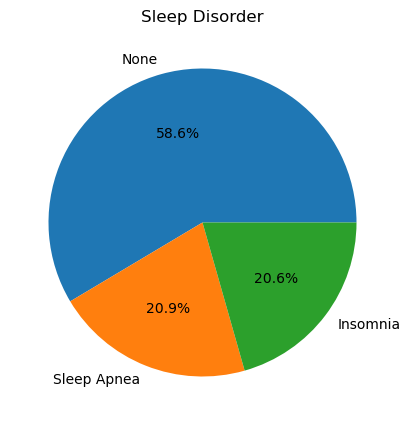

In [140]:
plt.figure(1, figsize=(5,5))
plt.title("Sleep Disorder")
sleep_df['Sleep Disorder'].value_counts().plot.pie(autopct="%1.1f%%") #try removing this - what happens?
plt.ylabel("") #try removing this - what happens?
plt.show()

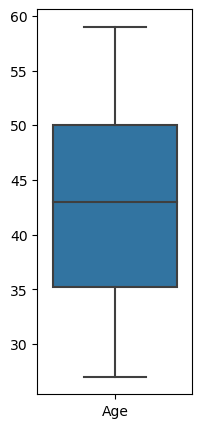

In [16]:
plt.figure(figsize=(2,5))
g = sns.boxplot(data = sleep_df[['Age']])